In [119]:
%pylab inline
qpm_dir = '/mnt/store1/oliverphilcox/QPM_Full2/'

Populating the interactive namespace from numpy and matplotlib


/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['diff']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [120]:
full_minmock = 1
full_maxmock = 1000
N_full = full_maxmock - full_minmock + 1

In [121]:
t = loadtxt(qpm_dir+'0001_corr.dat')
rr = t[:,-1]
N_bins = len(rr)
input_mu = t[:,0]
m=len(np.unique(input_mu))
input_r = t[:,1]
n = len(np.unique(input_r))
all_r = np.unique(input_r)
all_mu = np.unique(input_mu)

In [175]:
ratio=32292068/642051
#ratio=49.5

load qpm matrices

In [176]:
full_xi_qpm = zeros((N_full,N_bins))

for i in range(full_minmock,full_maxmock+1):
    mocknum = str(i).zfill(4)
    t = loadtxt(qpm_dir+mocknum+'_corr.dat')
    dd = t[:,-3]
    dr = t[:,-2]
    
    j = i - full_minmock
    full_xi_qpm[j] = (ratio**2) * dd/rr - (ratio) * dr/rr + 1

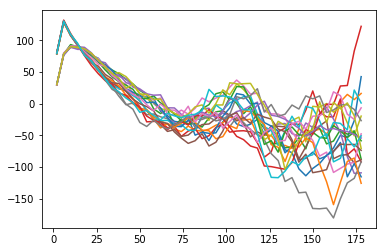

In [177]:
for i in range(10):
    plt.plot(all_r,full_xi_qpm.reshape(1000,n,m)[i,:,-2]*all_r*all_r)
    plt.plot(all_r,full_xi_qpm.reshape(1000,n,m)[i,:,-1]*all_r*all_r)

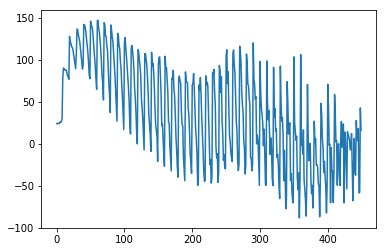

In [178]:
plt.plot(input_r*input_r*full_xi_qpm[0])

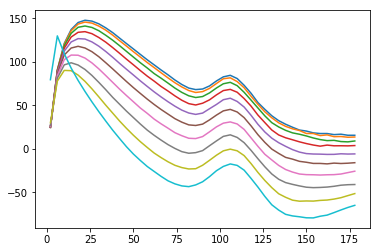

In [179]:
for i in range(10):
    plt.plot(np.unique(input_r),full_xi_qpm.mean(axis=0).reshape(-1,10)[:,i]*np.unique(input_r)**2.)

Save mean xi

In [180]:
qpm_mean_xi = full_xi_qpm.mean(axis=0).reshape(n,m)

outname = '/mnt/store1/oliverphilcox/Mock1QPM4/mean_xi.xi'
with open(outname,"w+") as outfile:
    for r in all_r:
        outfile.write("%.8e "%r)
    outfile.write("\n")
    for mu in all_mu:
        outfile.write("%.8e "%mu)
    outfile.write("\n")
    for i in range(n):
        for j in range(m):
            outfile.write("%.8e "%qpm_mean_xi[i,j])
        outfile.write("\n")

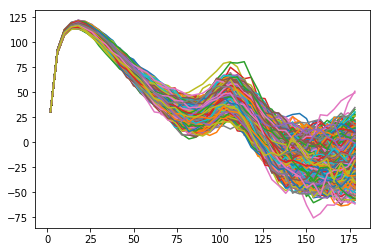

In [181]:
for i in range(999):
    plt.plot(all_r,all_r**2.*full_xi_qpm[i].reshape(-1,10).mean(axis=1))

Compute covariance of other mocks - use 40->180 binning here for comparison with code.

In [182]:
other_mocks = full_xi_qpm[1:,100:] # excluding mock 1
n_mocks = len(other_mocks)

mean_xi = np.mean(other_mocks,axis=0)
diff = other_mocks-mean_xi
qpm_covariance = np.matmul(diff.T,diff)/(n_mocks-1.)

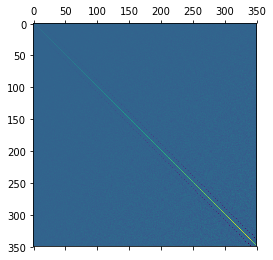

In [183]:
plt.matshow(np.linalg.inv(qpm_covariance))

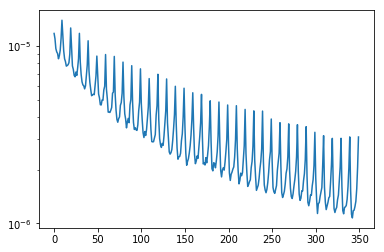

In [184]:
plt.plot(np.diag(qpm_covariance))
plt.yscale('log')

save this

In [185]:
np.savez('/mnt/store1/oliverphilcox/qpm_999_mock_covariance_improved.npz',cov=qpm_covariance,r_bins = all_r[10:],
        mu_bins = all_mu,prec=np.linalg.inv(qpm_covariance),n_mocks = n_mocks)

In [174]:
np.load('/mnt/store1/oliverphilcox/qpm_999_mock_covariance.npz')['cov']

array([[ 1.14593049e-05,  7.33789114e-06,  5.65651234e-06, ...,
        -6.31518005e-07, -3.68231988e-07, -3.03027557e-07],
       [ 7.33789114e-06,  1.06869429e-05,  6.28846766e-06, ...,
        -4.39306601e-07, -2.93369978e-07, -3.25037331e-07],
       [ 5.65651234e-06,  6.28846766e-06,  9.40192708e-06, ...,
        -4.35682649e-07, -4.17375142e-07, -1.43377477e-07],
       ...,
       [-6.31518005e-07, -4.39306601e-07, -4.35682649e-07, ...,
         1.52822102e-06,  8.21661946e-07,  2.53110461e-07],
       [-3.68231988e-07, -2.93369978e-07, -4.17375142e-07, ...,
         8.21661946e-07,  2.01762420e-06,  8.99129742e-07],
       [-3.03027557e-07, -3.25037331e-07, -1.43377477e-07, ...,
         2.53110461e-07,  8.99129742e-07,  2.98669369e-06]])

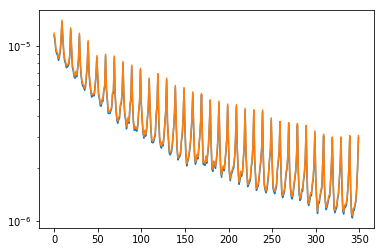

In [160]:
plt.plot(np.diag(np.load('/mnt/store1/oliverphilcox/qpm_999_mock_covariance.npz')['cov']))
plt.plot(np.diag(np.load('/mnt/store1/oliverphilcox/qpm_999_mock_covariance_improved.npz')['cov']))
plt.yscale('log')

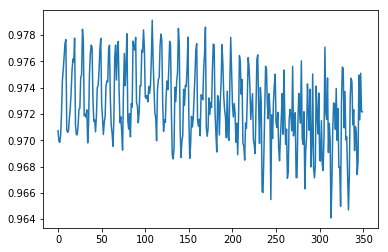

In [162]:
plt.plot(np.diag(np.load('/mnt/store1/oliverphilcox/qpm_999_mock_covariance.npz')['cov'])/np.diag(np.load('/mnt/store1/oliverphilcox/qpm_999_mock_covariance_improved.npz')['cov']))

check old functions are consistent

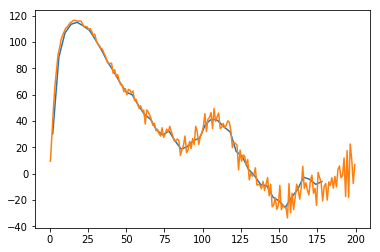

In [66]:
old_r=np.genfromtxt('/mnt/store1/oliverphilcox/Mock1QPM3/xi/xi_n200_m120_11.dat',max_rows=1)
old_xi = np.genfromtxt('/mnt/store1/oliverphilcox/Mock1QPM3/xi/xi_n200_m120_11.dat',skip_header=2)

plt.plot(all_r,all_r**2.*full_xi_qpm[0].reshape(n,m).mean(axis=1))
plt.plot(old_r,old_r**2.*old_xi.mean(axis=1))

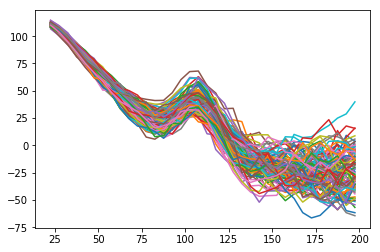

In [8]:
for i in range(98):
    plt.plot(new_r_center,all_xi[i].mean(axis=1)*new_r_center**2.)

In [9]:
flat_xi = np.asarray([xi.reshape(new_n*new_m) for xi in all_xi])
mean_xi = flat_xi.mean(axis=0)

### Compare to input QPM mock

In [235]:
xi_qpm1 = np.loadtxt('/mnt/store1/oliverphilcox/Mock1QPM2/xi/xi_n200_m120_11.dat',skiprows=2)
r_qpm = np.genfromtxt('/mnt/store1/oliverphilcox/Mock1QPM2/xi/xi_n200_m120_11.dat',max_rows=1)
mu_qpm = np.genfromtxt('/mnt/store1/oliverphilcox/Mock1QPM2/xi/xi_n200_m120_11.dat',max_rows=1,skip_header=1)

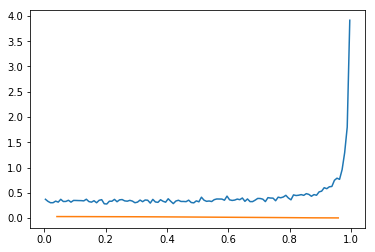

In [245]:
plt.plot(mu_qpm,xi_qpm1.mean(axis=0))
plt.plot(new_mu_bins.mean(axis=1),QPM_xi(1)[0].mean(axis=0))

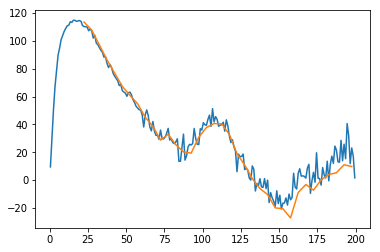

In [234]:
plt.plot(r_qpm,r_qpm*r_qpm*xi_qpm1.mean(axis=1))
plt.plot(new_r_center,new_r_center**2.*QPM_xi(1)[0].mean(axis=1))

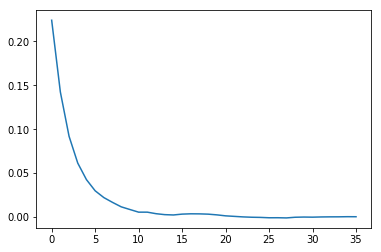

In [223]:
plt.plot(QPM_xi(1)[0].mean(axis=1))

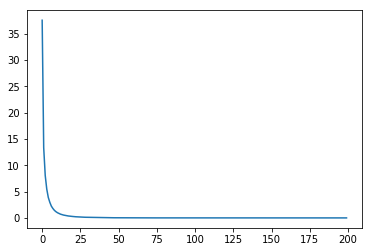

In [226]:
plt.plot(xi_qpm1.mean(axis=1))
#plt.plot(QPM_xi(1)[0].mean(axis=1))

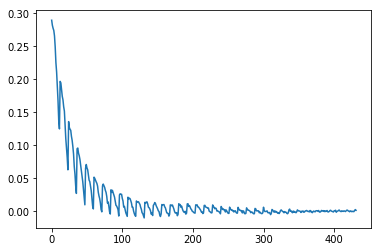

In [208]:
#plt.plot(xi_qpm1[:,:].reshape(200,120));
plt.plot(QPM_xi(1)[0].reshape(new_n*new_m));

### Check weights scalings

In [249]:
randoms = '/mnt/store1/oliverphilcox/Mock1QPM2/qpm_galaxies.xyzwj'

In [180]:
with open(randoms,"r") as infile:
    lc=0
    for line in infile:
        lc+=1
weights = np.zeros(lc)

In [181]:
with open(randoms,"r") as infile:
    for l,line in enumerate(infile):
        split_line=np.array(line.split(" "), dtype=float) 
        weights[l] = split_line[-2]

In [182]:
gal_weights = weights

In [178]:
random_weights = weights

In [192]:
(gal_weights.sum()/random_weights.sum()-0.1)*10*100

0.2828759575315143

(array([13.69594784,  4.02338886,  1.97123241,  1.15527564,  0.84001132,
         0.63512784,  0.27288596,  0.35421153,  0.30358381,  0.18422358]),
 array([0.104512 , 0.1471816, 0.1898512, 0.2325208, 0.2751904, 0.31786  ,
        0.3605296, 0.4031992, 0.4458688, 0.4885384, 0.531208 ]),
 <a list of 10 Patch objects>)

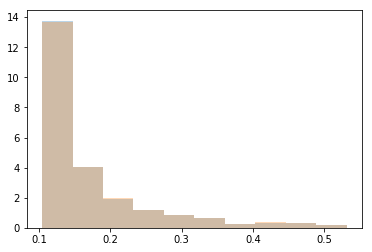

In [187]:
plt.hist(random_weights,density=True,alpha=0.3)
plt.hist(gal_weights,density=True,alpha=0.3)

In [12]:
cov = np.matmul((flat_xi-mean_xi).T,flat_xi-mean_xi)/((len(flat_xi)-1))
np.save('/mnt/store1/oliverphilcox/Mock1QPM2/98QPMCovariance.npy',cov)

In [13]:
all_cov=np.load('/mnt/store1/oliverphilcox/Mock1QPM/Rescaled_Covariance_Matrices_n39_m24_j169.npz')
theory_cov=all_cov.f.full_theory_covariance
data_jack_cov = all_cov.f.jackknife_data_covariance

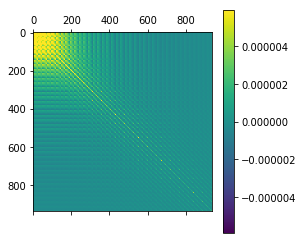

In [252]:
vmax=np.percentile(theory_cov,99.)
plt.matshow(theory_cov,vmax=vmax,vmin=-vmax);plt.colorbar();

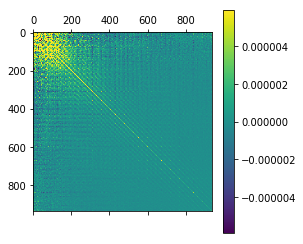

In [253]:
plt.matshow(data_jack_cov,vmax=vmax,vmin=-vmax);plt.colorbar();

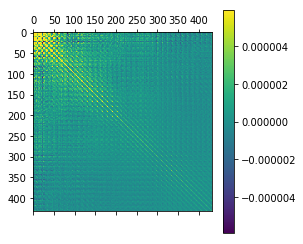

In [254]:
plt.matshow(cov,vmax=vmax,vmin=-vmax);plt.colorbar()

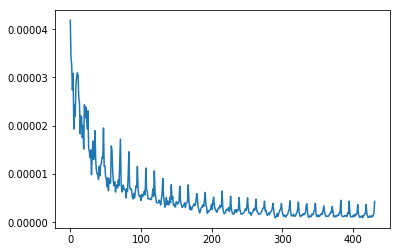

In [256]:
plt.plot(np.diag(cov),label='QPM Mocks')
#plt.plot(np.diag(theory_cov),label='Theory')
#plt.plot(np.diag(data_jack_cov),label='Jackknife Mock1')
#plt.yscale('log');plt.legend();

In [257]:
chol = np.linalg.cholesky(np.linalg.inv(theory_cov))
disc = np.matmul(chol,np.matmul(cov,chol.T))
plt.matshow(disc-np.eye(len(disc)),vmax=3,vmin=-3);plt.colorbar();

ValueError: shapes (432,432) and (936,936) not aligned: 432 (dim 1) != 936 (dim 0)